<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/ZIP_LInkedin_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil, floor
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
#plt.rcParams["figure.figsize"] = (15,10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.0/277.0 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [2]:
from os import stat
# 57 69 490
for trial in range(603,1000):
  random.seed(trial)
  counter = 0
  dic = {}
  for i in range(6):
    for j in range(6):
      dic[counter]=(i,j,0)
      counter +=1

  df = pd.DataFrame()
  N = 36

  nodes = [n for n in range(N)]
  df['X'] = [dic[n][0] for n in nodes]
  df['Y'] = [dic[n][1] for n in nodes]
  df['V'] = [dic[n][2] for n in nodes]

  selected = random.sample(nodes,8)

  for i in range(len(selected)):
    df.loc[selected[i],'V'] = i+1

  def dist(i,j,df):
    x1,y1 = df.loc[i,'X'],df.loc[i,'Y']
    x2,y2 = df.loc[j,'X'],df.loc[j,'Y']
    return int(ceil(np.sqrt( (x1-x2)**2 +(y1-y2)**2)))


  """
  plt.figure(figsize=(6,6))
  plt.scatter(df['X'],df['Y'],s=20)
  for n in nodes:
    x1,y1 = df.loc[n,'X'],df.loc[n,'Y']
    plt.text(x1,y1, s=str(n))
    if df.loc[n,'V']>0:
      plt.text(x1,y1-0.2, s=str(df.loc[n,'V']), c= 'b')
  plt.show()
  """



  model = cp_model.CpModel()
  solver = cp_model.CpSolver()
  U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}")  for i in nodes for j in nodes if dist(i,j,df)==1}
  Visit = {i:model.NewIntVar(0,len(nodes), f"visit_{i}")  for i in nodes}
  arcs = [(i,j,v) for (i,j),v in U.items() ]
  max_inx, min_idx = selected[-1], selected[0]
  arcs += [(max_inx, min_idx,True)]
  model.AddCircuit(arcs)

  for (i,j),v in U.items():
    if j!= max_inx:
      model.Add(Visit[i]<Visit[j]).OnlyEnforceIf(v)
  for i in nodes:
    for j in nodes:
        if 0 < df.loc[i,'V'] < df.loc[j,'V']:
          model.Add(Visit[i]<Visit[j])
  expressions = [v*dist(i,j,df) for (i,j),v in U.items() ]
  model.Minimize(sum(expressions))
  status = solver.Solve(model)
  solver.status_name(status)
  if status == cp_model.OPTIMAL:
    print(trial, solver.ObjectiveValue())
    print(selected)
    break

648 35.0
[11, 20, 14, 7, 26, 28, 22, 10]


In [3]:
print(status)

4


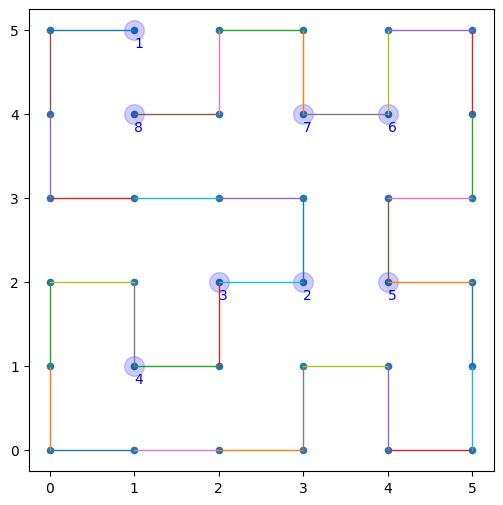

In [4]:
plt.figure(figsize=(6,6))

plt.scatter(df['X'],df['Y'],s=20)
for n in nodes:
  x1,y1 = df.loc[n,'X'],df.loc[n,'Y']
  #plt.text(x1,y1-0.2, s=str(n), alpha= 0.2)
  if df.loc[n,'V']>0:
    plt.text(x1,y1-0.2, s=str(df.loc[n,'V']), c= 'b', alpha= 1)
    plt.scatter(x1,y1, s=200, c= 'b', alpha= 0.2)



for (i,j),v in U.items():
  if solver.Value(v)>0:
    x1,y1 = df.loc[i,'X'],df.loc[i,'Y']
    x2,y2 = df.loc[j,'X'],df.loc[j,'Y']
    plt.plot([x1,x2],[y1,y2], lw= 1)
    #plt.text(x1,y1, s= str(solver.value(Visit[i])))
plt.xticks()
plt.yticks()

plt.show()